In [1]:
import scipy.io as scio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

[[ 1.2       ]
 [ 1.14147531]
 [ 1.08580491]
 ..., 
 [ 0.92656727]
 [ 0.90576031]
 [ 0.88388514]]


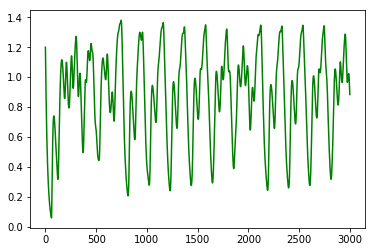

In [2]:
'''load training data'''
dataFile = 'training.txt'
data = scio.loadmat(dataFile)
data_training = data['training']
print (data_training)
xrange = np.arange(0,3000,1)
p1 = plt.plot(xrange, data_training, 'g')

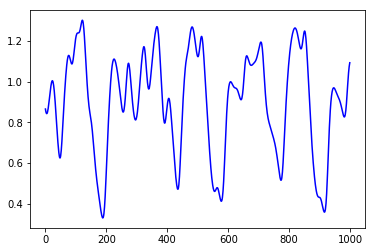

In [3]:
'''load validate data'''
dataFile = 'validate.txt'
data = scio.loadmat(dataFile)
data_validate = data['validate']
#print (data_validate)
xrange_2 = np.arange(0,1000,1)
p2 = plt.plot(xrange_2, data_validate, 'b')

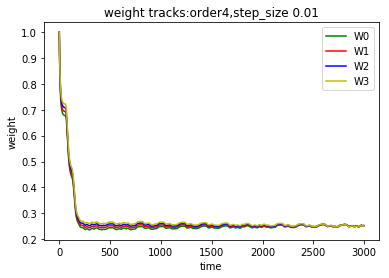

In [4]:
#caculate w for different step size
eta_list = [0.0001,0.001,0.01,0.1,0.6] #different setp size
eta = eta_list[2]
w_list = []    
k = 4 #order
a = np.array([[1]])
w = np.array([[1]])
for d in range(1,k):
    w= np.r_[w,a]
e_list = []
i = 0
while i<3000-k:
    w_list.append(w) #store w for each step
    x = np.zeros((1, k))
    for j in range (0,k):
        x[0][j] = data_training[i+j]
    #print(x)   
    d = data_training[i]
    e = d - x.dot(w)
    e_list.append(e[0]) #store error for each step
    w_forward = w + eta * e * x.T
    w = w_forward 
    i += 1
#plot weight track
xrange = np.arange(0,3000-k,1)
plt.title('weight tracks:'+'order'+str(k)+',step_size '+str(eta))
w_0 =[]
w_1 =[]
w_2 =[]
w_3 =[]
for w in w_list:
    w_0.append(w[0])
    w_1.append(w[1])
    w_2.append(w[2])
    w_3.append(w[3])
p1 = plt.plot(xrange, w_0, 'g',label="W0")    
p1 = plt.plot(xrange, w_1, 'r',label="W1") 
p1 = plt.plot(xrange, w_2, 'b',label="W2") 
p1 = plt.plot(xrange, w_3, 'y',label="W3") 
plt.legend(loc='upper right')
plt.ylabel('weight')
plt.xlabel('time')


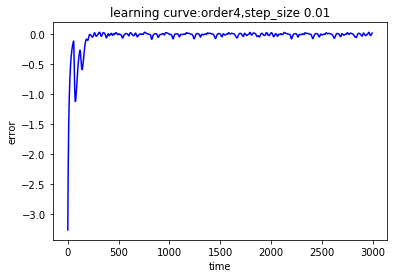

In [5]:
#plot learning curve
xrange = np.arange(0,3000-k,1)
plt.title('learning curve:'+'order'+str(k)+',step_size '+str(eta))
p2 = plt.plot(xrange, e_list, 'b') 
plt.ylabel('error') #label x and y axes
plt.xlabel('time')